<a href="https://colab.research.google.com/github/vorobieva/validate_de_novo_designed_proteins/blob/main/Code/analysis_Fig4_A%2CB%2CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount google drive
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

input_seq = '/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/TMB12_14.fasta' #@param {type:"string"}
result_AF = '/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/results_AF' #@param {type:"string"}
result_ESMF = '/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/results_ESMF' #@param {type:"string"}


In [ ]:
inputs=[]
with open(input_seq, "r") as in_f:
  for line in in_f:
    if line.startswith(">"):
      inputs.append(line[1:].strip())
    else:
      pass
print(inputs)

['TMB12sol09_0', 'TMB12sol09_1', 'TMB12sol09_2', 'TMB12sol09_3', 'TMB12sol09_4', 'TMB12sol09_5', 'TMB12sol09_6', 'TMB12sol09_7', 'TMB12sol09_8', 'TMB12sol09_9', 'CB001', 'CB002', 'CB003', 'CB004', 'CB005', 'CB006', 'CB008', 'CB009', 'CB010', 'CB012', 'CB013', 'CB014', 'CB015', 'TMB12_12_1', 'TMB12_12_2', 'TMB12_12_3', 'TMB12_12_4', 'TMB12_12_5', 'TMB12_12_6', 'TMB12_12_7', 'TMB12_12_8', 'TMB12_12_9', 'TMB12_12_10', 'TMB12_12_11', 'TMB12_12_12', 'TMB12_12_13', 'TMB12_12_14', 'TMB12_16_1', 'TMB12_16_2', 'TMB12_16_3']


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import json
import numpy as np

%matplotlib inline

In [ ]:
def permutation_test(dis1,dis2,n_permutations):
  n, k = len(dis1), 0
  diff = np.abs(np.mean(dis1) - np.mean(dis2))
  stats = np.zeros(n_permutations)
  all_dis = np.concatenate([dis1, dis2])
  for j in range(n_permutations):
    np.random.shuffle(all_dis)
#    labels = np.random.permutation((df['Group'] == 'treatment').values)
    k += diff < np.abs(np.mean(all_dis[:n]) - np.mean(all_dis[n:]))
#    stats[k] = np.mean(income[labels]) - np.mean(income[labels==False])
  p_value = k / n_permutations
  return(p_value)
#print(f"Permutation test: p-value={p_value:.4f}")

In [ ]:
dict_AF = {}
dict_ESMF = {}

for input in inputs:
    if input.split("_")[0] == "TMB12sol09":
        models = []
        for i in range(1,6):
            for f in glob.glob(result_AF+"/"+input+"_unrelaxed_rank_"+str(i)+"*_scores.json"):
                with open(f, "r") as in_f:
                    data = json.load(in_f)
                    models.append(sum(data['plddt'])/len(data['plddt']))
        dict_AF[input] = models
        for f in glob.glob(result_ESMF+"/"+input.replace(".","_")+"_ESMF_*/*_default.pdb"):
            pLDDT = []
            pLDDT_backbone = []
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pLDDT_backbone.append(float(vals[10]))
                        pLDDT.append(float(vals[10]))
            dict_ESMF[input] = [sum(pLDDT)/len(pLDDT), sum(pLDDT_backbone)/len(pLDDT_backbone)]
    elif input[0:2] == "CB":
        models = []
        for i in range(1,6):
            for f in glob.glob(result_AF+"/"+input+"_*_unrelaxed_rank_"+str(i)+"*_scores.json"):
                with open(f, "r") as in_f:
                    data = json.load(in_f)
                    models.append(sum(data['plddt'])/len(data['plddt']))
        dict_AF[input] = models
        for f in glob.glob(result_ESMF+"/"+input+"_ESMF_*/*_default.pdb"):
            pLDDT = []
            pLDDT_backbone = []
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pLDDT_backbone.append(float(vals[10]))
                        pLDDT.append(float(vals[10]))
            dict_ESMF[input] = [sum(pLDDT)/len(pLDDT), sum(pLDDT_backbone)/len(pLDDT_backbone)]
    elif input.split("_")[0] == "TMB12":
        models = []
        for i in range(1,6):
            for f in glob.glob(result_AF+"/"+input+"_*_unrelaxed_rank_"+str(i)+"*_scores.json"):
                with open(f, "r") as in_f:
                    data = json.load(in_f)
                    models.append(sum(data['plddt'])/len(data['plddt']))
        dict_AF[input] = models
        for f in glob.glob(result_ESMF+"/"+input+"_ESMF_*/*_default.pdb"):
            pLDDT = []
            pLDDT_backbone = []
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pLDDT_backbone.append(float(vals[10]))
                        pLDDT.append(float(vals[10]))
            dict_ESMF[input] = [sum(pLDDT)/len(pLDDT), sum(pLDDT_backbone)/len(pLDDT_backbone)]

print(dict_AF)
print(dict_ESMF)

{'TMB12sol09_0': [63.68766666666665, 60.80149999999999, 60.755666666666656, 59.18933333333335, 55.18544444444447], 'TMB12sol09_1': [72.52533333333334, 69.42277777777775, 65.19955555555552, 62.00783333333333, 60.66822222222221], 'TMB12sol09_2': [83.04388888888887, 56.694111111111134, 48.06727777777778, 32.927555555555564, 30.528999999999986], 'TMB12sol09_3': [91.44283333333335, 90.85933333333331, 88.88911111111112, 88.48283333333335, 66.692], 'TMB12sol09_4': [70.298, 62.18372222222222, 61.31344444444439, 53.44949999999998, 48.04772222222219], 'TMB12sol09_5': [86.14205555555557, 86.01672222222216, 70.2723888888889, 63.381111111111125, 55.96372222222224], 'TMB12sol09_6': [76.23400000000001, 71.45211111111115, 69.46383333333335, 61.20277777777775, 57.61177777777779], 'TMB12sol09_7': [87.9242777777778, 87.19344444444447, 81.97416666666665, 70.14661111111113, 52.86255555555556], 'TMB12sol09_8': [63.542444444444484, 52.484, 50.77133333333337, 49.41655555555556, 47.89088888888891], 'TMB12sol09

In [ ]:
dict_rmsd_ESMF={'TMB12sol09_0':0.99, 'TMB12sol09_1':1.11, 'TMB12sol09_2':1.13, 'TMB12sol09_3':1.12, 'TMB12sol09_4':1.47, 'TMB12sol09_5':1.10, 'TMB12sol09_6':1.54, 'TMB12sol09_7':1.33, 'TMB12sol09_8':1.16, 'TMB12sol09_9':1.20, 'CB001':1.36, 'CB002':5.16, 'CB003':5.75, 'CB004':1.36, 'CB005':1.22, 'CB006':1.43, 'CB008':1.60, 'CB009':0.79, 'CB010':1.35, 'CB012':1.48, 'CB013':6.18, 'CB014':1.43, 'CB015':1.25, 'TMB12_12_1':1.37, 'TMB12_12_2':1.55, 'TMB12_12_3':2.26, 'TMB12_12_4':1.66, 'TMB12_12_5':1.11, 'TMB12_12_6':1.54, 'TMB12_12_7':2.20, 'TMB12_12_8':1.30, 'TMB12_12_9':1.25, 'TMB12_12_10':1.61, 'TMB12_12_11':1.16, 'TMB12_12_12':1.37, 'TMB12_12_13':1.39, 'TMB12_12_14':1.80, 'TMB12_16_1':1.64, 'TMB12_16_2':1.39, 'TMB12_16_3':1.28}

In [ ]:
dict_rmsd_AF={'TMB12sol09_0': [3.62,3.21,3.62,3.84,3.27], 'TMB12sol09_1': [2.55,4.24,5.82,2.61,4.41], 'TMB12sol09_2': [3.21,3.62,4.83,5.03,5.35], 'TMB12sol09_3': [1.49,4.99,1.55,1.67,3.66], 'TMB12sol09_4': [3.90,5.34,5.46,5.63,6.04], 'TMB12sol09_5': [5.19,2.73,4.19,2.76,3.23], 'TMB12sol09_6': [4.50,2.90,2.95,3.26,4.46], 'TMB12sol09_7': [1.73,2.09,2.32,4.05,2.80], 'TMB12sol09_8': [3.13,2.77,3.04,5.83,4.86], 'TMB12sol09_9': [1.51,1.53,1.53,1.48,3.21], 'CB001': [1.49,3.71,4.36,4.19,4.77], 'CB002': [5.40,4.85,4.99,4.10,5.16], 'CB003': [5.76,5.69,6.37,6.08,5.19], 'CB004': [4.99,5.14,5.69,4.32,5.90], 'CB005': [3.65,3.74,5.46,5.29,4.53], 'CB006': [1.51,1.56,1.58,4.95,5.58], 'CB008': [1.53,1.86,2.08,1.73,4.16], 'CB009': [4.50,2.27,4.10,5.80,3.76], 'CB010': [4.28,4.49,3.78,4.17,3.28], 'CB012': [1.77,4.59,5.94,5.01,5.13], 'CB013': [5.70,5.25,6.27,5.33,5.46], 'CB014': [3.61,4.55,4.29,4.12,4.26], 'CB015': [3.79,3.22,4.74,4.58,5.20], 'TMB12_12_1': [4.62,5.41,6.03,5.98,4.91], 'TMB12_12_2': [6.23,5.14,5.74,5.77,5.69], 'TMB12_12_3': [4.96,5.29,4.34,5.54,5.05], 'TMB12_12_4': [4.61,4.93,4.70,4.82,4.85], 'TMB12_12_5': [4.86,5.18,5.19,4.17,5.86], 'TMB12_12_6': [4.07,4.23,4.24,5.33,5.22], 'TMB12_12_7': [2.47,2.82,5.26,5.00,4.73], 'TMB12_12_8': [5.66,4.67,5.08,5.47,5.78], 'TMB12_12_9': [4.54,3.85,4.21,4.97,3.36], 'TMB12_12_10': [1.46,4.63,4.05,5.19,4.13], 'TMB12_12_11': [4.57,5.63,4.69,5.93,6.13], 'TMB12_12_12': [4.69,5.35,4.24,4.89,4.52], 'TMB12_12_13': [1.39,1.45,1.44,1.49,5.32], 'TMB12_12_14': [6.08,5.52,5.59,5.87,4.99], 'TMB12_16_1': [2.32,3.66,4.54,6.04,4.36], 'TMB12_16_2': [2.72,5.09,3.25,4.67,5.94], 'TMB12_16_3': [3.00,5.20,4.49,3.59,5.10]}

In [ ]:
dict_seq_prop={'TMB12sol09_0':[2131.54,45.0,3.3,51.7], 'TMB12sol09_1':[1286.1,41.7,6.1,52.2], 'TMB12sol09_2':[1182.43,43.3,0.0,56.7], 'TMB12sol09_3':[326.091,42.2,0.0,57.8], 'TMB12sol09_4':[576.925,45.0,0.0,55.0], 'TMB12sol09_5':[1389.3,43.9,5.0,51.1], 'TMB12sol09_6':[2336.75,45.0,0.0,55.0], 'TMB12sol09_7':[3116.98,42.2,6.7,51.1], 'TMB12sol09_8':[326.893,41.7,0.0,58.3], 'TMB12sol09_9':[1333.81,45.0,1.7,53.3], 'CB001':[2.29002,36.6,0.0,63.4], 'CB002':[1867.36,37.1,1.1,62.9], 'CB003':[531.293,37.7,0.0,62.3], 'CB004':[7.74001,44.6,0.0,55.4], 'CB005':[1762.59,46.9,0.0,53.1], 'CB006':[560.62,33.1,0.0,66.9], 'CB008':[249.486,22.9,0.0,77.1], 'CB009':[41.2957,43.4,0.0,56.6], 'CB010':[1710.76,30.3,0.0,69.7], 'CB012':[1785.86,46.9,0.0,53.1], 'CB013':[72.7533,28.6,0.0,71.4], 'CB014':[2097.46,49.7,0.0,50.3], 'CB015':[12.0503,42.9,0.0,57.1], 'TMB12_12_1':[962.837,43.1,0.0,56.9], 'TMB12_12_2':[668.96,40.2,0.0,59.8], 'TMB12_12_3':[781.997,42.5,0.0,57.5], 'TMB12_12_4':[1644.03,48.3,0.0,51.7], 'TMB12_12_5':[2296.67,40.8,0.6,58.6], 'TMB12_12_6':[303.744,40.8,0.0,59.2], 'TMB12_12_7':[1484.57,45.4,0.0,54.6], 'TMB12_12_8':[1211.99,39.7,0.0,60.3], 'TMB12_12_9':[738.146,48.3,0.0,51.7], 'TMB12_12_10':[466.561,48.3,0.6,51.1], 'TMB12_12_11':[940.558,46.0,0.0,54.0], 'TMB12_12_12':[691.15,47.7,0.0,52.3], 'TMB12_12_13':[259.684,39.1,0.0,60.9], 'TMB12_12_14':[1796.98,42.5,0.0,57.5], 'TMB12_16_1':[256.255,47.8,0.0,52.2], 'TMB12_16_2':[162.257,47.8,0.0,52.2], 'TMB12_16_3':[190.413,39.8,0.0,60.2]}

In [ ]:
results={'TMB12sol09_0':[1,1,0], 'TMB12sol09_1':[1,1,0], 'TMB12sol09_2':[1,1,0], 'TMB12sol09_3':[1,1,1], 'TMB12sol09_4':[1,1,0], 'TMB12sol09_5':[1,1,0], 'TMB12sol09_6':[1,1,0], 'TMB12sol09_7':[1,1,0], 'TMB12sol09_8':[1,1,0], 'TMB12sol09_9':[1,1,1], 'CB001':[1,1,1], 'CB002':[1,1,0], 'CB003':[1,1,0], 'CB004':[1,1,0], 'CB005':[1,1,1], 'CB006':[1,0,0], 'CB008':[1,1,0], 'CB009':[1,1,0], 'CB010':[1,1,0], 'CB012':[1,0,0], 'CB013':[1,1,0], 'CB014':[1,1,0], 'CB015':[1,1,0], 'TMB12_12_1':[1,1,0], 'TMB12_12_2':[1,1,0], 'TMB12_12_3':[1,1,0], 'TMB12_12_4':[1,1,0], 'TMB12_12_5':[1,1,0], 'TMB12_12_6':[1,1,0], 'TMB12_12_7':[1,1,0], 'TMB12_12_8':[1,1,0], 'TMB12_12_9':[1,1,0], 'TMB12_12_10':[1,1,0], 'TMB12_12_11':[1,1,0], 'TMB12_12_12':[1,1,0], 'TMB12_12_13':[1,1,1], 'TMB12_12_14':[1,1,0], 'TMB12_16_1':[1,1,0], 'TMB12_16_2':[1,1,1], 'TMB12_16_3':[1,1,1]}

In [ ]:
index_labels=["model_1","model_2","model_3","model_4","model_5"]
dAF = pd.DataFrame(dict_AF, index=index_labels)
dAF = dAF.T
dAF

,model_1,model_2,model_3,model_4,model_5
TMB12sol09_0,63.687667,60.801500,60.755667,59.189333,55.185444
TMB12sol09_1,72.525333,69.422778,65.199556,62.007833,60.668222
TMB12sol09_2,83.043889,56.694111,48.067278,32.927556,30.529000
TMB12sol09_3,91.442833,90.859333,88.889111,88.482833,66.692000
TMB12sol09_4,70.298000,62.183722,61.313444,53.449500,48.047722
TMB12sol09_5,86.142056,86.016722,70.272389,63.381111,55.963722
TMB12sol09_6,76.234000,71.452111,69.463833,61.202778,57.611778
TMB12sol09_7,87.924278,87.193444,81.974167,70.146611,52.862556
TMB12sol09_8,63.542444,52.484000,50.771333,49.416556,47.890889
TMB12sol09_9,91.295333,91.040889,88.870167,88.259444,61.783444


In [ ]:
index_labels=["plDDT_all","plDDT_backbone"]
dESM = pd.DataFrame(dict_ESMF, index=index_labels)
dESM = dESM.T
dESM

,plDDT_all,plDDT_backbone
TMB12sol09_0,84.737769,88.594775
TMB12sol09_1,84.746295,88.322215
TMB12sol09_2,79.137624,83.887328
TMB12sol09_3,80.001386,84.415795
TMB12sol09_4,79.654332,83.895808
TMB12sol09_5,83.335512,87.228802
TMB12sol09_6,83.428065,87.013397
TMB12sol09_7,83.708607,87.099605
TMB12sol09_8,78.033927,82.467497
TMB12sol09_9,85.993071,89.638563


In [ ]:
index_labels=["RMS_model_1","RMS_model_2","RMS_model_3","RMS_model_4","RMS_model_5"]
dAFrms = pd.DataFrame(dict_rmsd_AF , index=index_labels)
dAFrms = dAFrms.T
dAFrms

,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5
TMB12sol09_0,3.62,3.21,3.62,3.84,3.27
TMB12sol09_1,2.55,4.24,5.82,2.61,4.41
TMB12sol09_2,3.21,3.62,4.83,5.03,5.35
TMB12sol09_3,1.49,4.99,1.55,1.67,3.66
TMB12sol09_4,3.90,5.34,5.46,5.63,6.04
TMB12sol09_5,5.19,2.73,4.19,2.76,3.23
TMB12sol09_6,4.50,2.90,2.95,3.26,4.46
TMB12sol09_7,1.73,2.09,2.32,4.05,2.80
TMB12sol09_8,3.13,2.77,3.04,5.83,4.86
TMB12sol09_9,1.51,1.53,1.53,1.48,3.21


In [ ]:
index_labels=["RMS_ESM"]
dESMrms = pd.DataFrame(dict_rmsd_ESMF, index=index_labels)
dESMrms = dESMrms.T
dESMrms

,RMS_ESM
TMB12sol09_0,0.99
TMB12sol09_1,1.11
TMB12sol09_2,1.13
TMB12sol09_3,1.12
TMB12sol09_4,1.47
TMB12sol09_5,1.10
TMB12sol09_6,1.54
TMB12sol09_7,1.33
TMB12sol09_8,1.16
TMB12sol09_9,1.20


In [ ]:
index_labels=["aggregation","beta_sheet","alpha_helix","coiled_coil"]
dprop = pd.DataFrame(dict_seq_prop, index=index_labels)
dprop = dprop.T
dprop

,aggregation,beta_sheet,alpha_helix,coiled_coil
TMB12sol09_0,2131.54000,45.0,3.3,51.7
TMB12sol09_1,1286.10000,41.7,6.1,52.2
TMB12sol09_2,1182.43000,43.3,0.0,56.7
TMB12sol09_3,326.09100,42.2,0.0,57.8
TMB12sol09_4,576.92500,45.0,0.0,55.0
TMB12sol09_5,1389.30000,43.9,5.0,51.1
TMB12sol09_6,2336.75000,45.0,0.0,55.0
TMB12sol09_7,3116.98000,42.2,6.7,51.1
TMB12sol09_8,326.89300,41.7,0.0,58.3
TMB12sol09_9,1333.81000,45.0,1.7,53.3


In [ ]:
index_labels=["expression","solubility (detergent)","folded"]
dresults = pd.DataFrame(results, index=index_labels)
dresults = dresults.T
dresults

,expression,solubility (detergent),folded
TMB12sol09_0,1,1,0
TMB12sol09_1,1,1,0
TMB12sol09_2,1,1,0
TMB12sol09_3,1,1,1
TMB12sol09_4,1,1,0
TMB12sol09_5,1,1,0
TMB12sol09_6,1,1,0
TMB12sol09_7,1,1,0
TMB12sol09_8,1,1,0
TMB12sol09_9,1,1,1


In [ ]:
df_ESM = pd.concat([dESM,dESMrms,dprop,dresults], axis=1)
df_ESM

,plDDT_all,plDDT_backbone,RMS_ESM,aggregation,beta_sheet,alpha_helix,coiled_coil,expression,solubility (detergent),folded
TMB12sol09_0,84.737769,88.594775,0.99,2131.54000,45.0,3.3,51.7,1,1,0
TMB12sol09_1,84.746295,88.322215,1.11,1286.10000,41.7,6.1,52.2,1,1,0
TMB12sol09_2,79.137624,83.887328,1.13,1182.43000,43.3,0.0,56.7,1,1,0
TMB12sol09_3,80.001386,84.415795,1.12,326.09100,42.2,0.0,57.8,1,1,1
TMB12sol09_4,79.654332,83.895808,1.47,576.92500,45.0,0.0,55.0,1,1,0
TMB12sol09_5,83.335512,87.228802,1.10,1389.30000,43.9,5.0,51.1,1,1,0
TMB12sol09_6,83.428065,87.013397,1.54,2336.75000,45.0,0.0,55.0,1,1,0
TMB12sol09_7,83.708607,87.099605,1.33,3116.98000,42.2,6.7,51.1,1,1,0
TMB12sol09_8,78.033927,82.467497,1.16,326.89300,41.7,0.0,58.3,1,1,0
TMB12sol09_9,85.993071,89.638563,1.20,1333.81000,45.0,1.7,53.3,1,1,1


In [ ]:
df_AF = pd.concat([dAF,dAFrms,dprop,dresults], axis=1, join="inner")
df_AF

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,alpha_helix,coiled_coil,expression,solubility (detergent),folded
TMB12sol09_0,63.687667,60.801500,60.755667,59.189333,55.185444,3.62,3.21,3.62,3.84,3.27,2131.54000,45.0,3.3,51.7,1,1,0
TMB12sol09_1,72.525333,69.422778,65.199556,62.007833,60.668222,2.55,4.24,5.82,2.61,4.41,1286.10000,41.7,6.1,52.2,1,1,0
TMB12sol09_2,83.043889,56.694111,48.067278,32.927556,30.529000,3.21,3.62,4.83,5.03,5.35,1182.43000,43.3,0.0,56.7,1,1,0
TMB12sol09_3,91.442833,90.859333,88.889111,88.482833,66.692000,1.49,4.99,1.55,1.67,3.66,326.09100,42.2,0.0,57.8,1,1,1
TMB12sol09_4,70.298000,62.183722,61.313444,53.449500,48.047722,3.90,5.34,5.46,5.63,6.04,576.92500,45.0,0.0,55.0,1,1,0
TMB12sol09_5,86.142056,86.016722,70.272389,63.381111,55.963722,5.19,2.73,4.19,2.76,3.23,1389.30000,43.9,5.0,51.1,1,1,0
TMB12sol09_6,76.234000,71.452111,69.463833,61.202778,57.611778,4.50,2.90,2.95,3.26,4.46,2336.75000,45.0,0.0,55.0,1,1,0
TMB12sol09_7,87.924278,87.193444,81.974167,70.146611,52.862556,1.73,2.09,2.32,4.05,2.80,3116.98000,42.2,6.7,51.1,1,1,0
TMB12sol09_8,63.542444,52.484000,50.771333,49.416556,47.890889,3.13,2.77,3.04,5.83,4.86,326.89300,41.7,0.0,58.3,1,1,0
TMB12sol09_9,91.295333,91.040889,88.870167,88.259444,61.783444,1.51,1.53,1.53,1.48,3.21,1333.81000,45.0,1.7,53.3,1,1,1


In [ ]:
import pickle

df_AF.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/df_AF.pkl")
df_ESM.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/df_ESM.pkl")

In [ ]:
df_AF.to_csv("/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/df_AF.csv")
df_ESM.to_csv("/content/google_drive/My Drive/AF_vs_ESMF/TMB12_14/df_ESM.csv")


<Axes: xlabel='model_1', ylabel='RMS_model_1'>

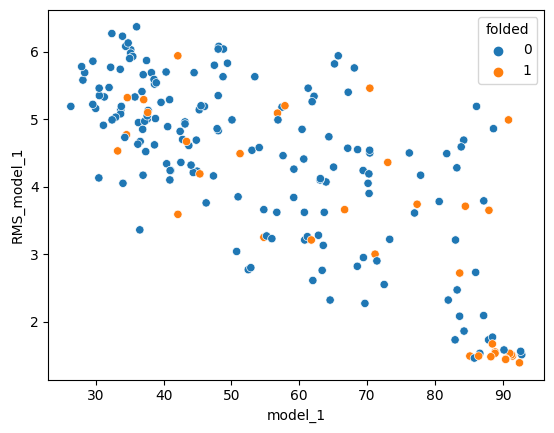

In [ ]:
sns.scatterplot(data=df_AF, x="model_1", y="RMS_model_1", hue="folded")
sns.scatterplot(data=df_AF, x="model_2", y="RMS_model_2", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_3", y="RMS_model_3", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_4", y="RMS_model_4", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_5", y="RMS_model_5", hue="folded",legend = False)

<Axes: xlabel='model_1', ylabel='beta_sheet'>

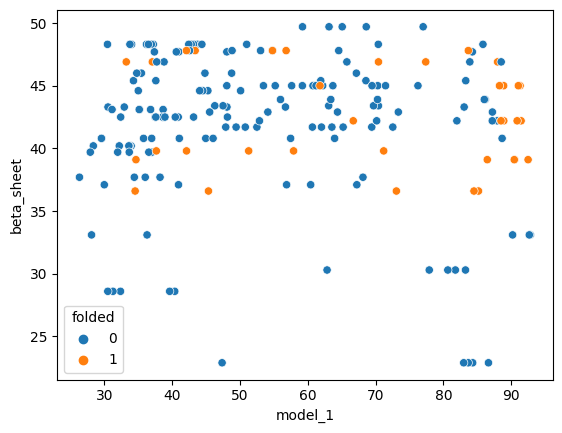

In [ ]:
sns.scatterplot(data=df_AF, x="model_1", y="beta_sheet", hue="folded")
sns.scatterplot(data=df_AF, x="model_2", y="beta_sheet", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_3", y="beta_sheet", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_4", y="beta_sheet", hue="folded",legend = False)
sns.scatterplot(data=df_AF, x="model_5", y="beta_sheet", hue="folded",legend = False)

In [ ]:
df_AF_filt = df_AF.loc[(df_AF["beta_sheet"]>32) & (df_AF["aggregation"]<1800) ]


In [ ]:
df_AF_filt.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_4_ABC_updated.csv")

(22.0, 95.0)

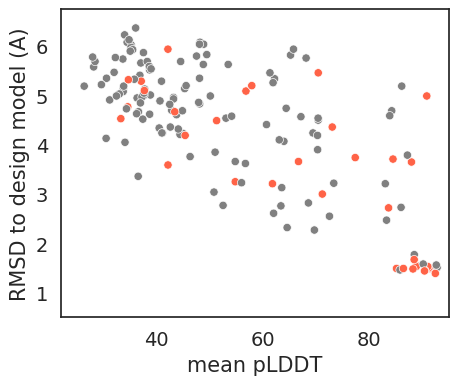

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_AF_filt, x="model_1", y="RMS_model_1", hue="folded",legend = False,palette=cols)
sns.scatterplot(data=df_AF_filt, x="model_2", y="RMS_model_2", hue="folded",legend = False,ax=ax,palette=cols)
sns.scatterplot(data=df_AF_filt, x="model_3", y="RMS_model_3", hue="folded",legend = False,ax=ax,palette=cols)
sns.scatterplot(data=df_AF_filt, x="model_4", y="RMS_model_4", hue="folded",legend = False,ax=ax,palette=cols)
sns.scatterplot(data=df_AF_filt, x="model_5", y="RMS_model_5", hue="folded",legend = False,ax=ax,palette=cols)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.75)
plt.xlim(22, 95)

(22.0, 95.0)

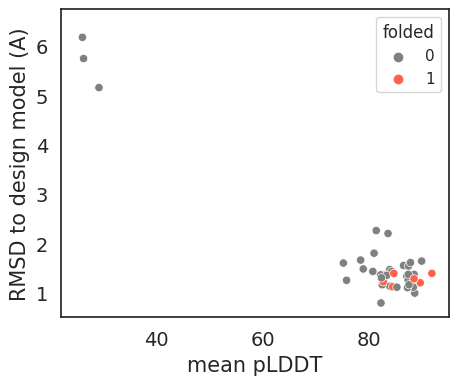

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM, x="plDDT_backbone", y="RMS_ESM", hue="folded", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.75)
plt.xlim(22, 95)

In [ ]:
df_ESM_filt = df_ESM.loc[(df_ESM["beta_sheet"]>32) & (df_ESM["aggregation"]<1800) ]


In [ ]:
df_ESM_filt.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_4C.csv")

(22.0, 95.0)

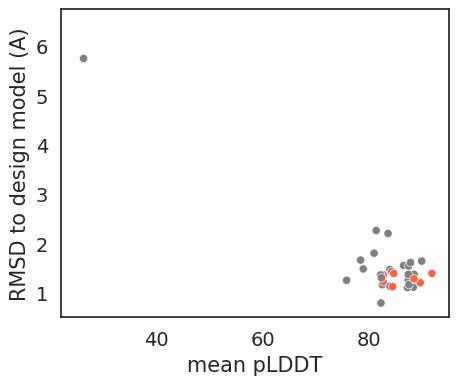

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filt, x="plDDT_backbone", y="RMS_ESM", hue="folded", palette=cols, legend=None)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.75)
plt.xlim(22, 95)

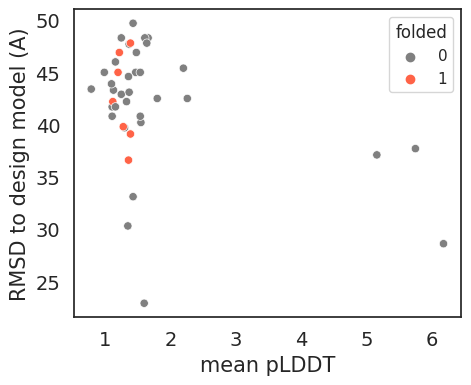

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM, x="RMS_ESM", y="beta_sheet", hue="folded", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 6.25)
#plt.xlim(22, 95)

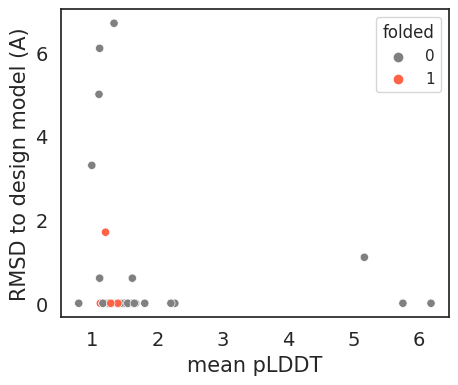

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM, x="RMS_ESM", y="alpha_helix", hue="folded", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 6.25)
#plt.xlim(22, 95)

In [ ]:
dAF_stack=dAF.stack()
dAFrms = dAFrms.rename(columns={"RMS_model_1": "model_1", "RMS_model_2": "model_2", "RMS_model_3": "model_3", "RMS_model_4": "model_4", "RMS_model_5": "model_5"})
dAFrms_stack= dAFrms.stack()

dAF_only = pd.concat([dAF_stack, dAFrms_stack], axis=1)
dAF_only = dAF_only.rename(columns={0:'plDDT',1:"RMSD"}, index={0:'design',1:'model'})
dAF_only.index.names = ['design','model']
dresults.index.names = ['design']
dprop.index.names = ['design']

dAF_F = dresults.join(dAF_only, how="inner")
dAF_F = dprop.join(dAF_F, how="inner")
#dAF3_Filt2 = dAF3_F2.loc[(dAF3_F2["beta_sheet"]<50) & (dAF3_F2["aggregation"]<1750) ]
dAF_F

aggregation  beta_sheet  alpha_helix  coiled_coil  \
design       model                                                        
TMB12sol09_0 model_1     2131.540        45.0          3.3         51.7   
             model_2     2131.540        45.0          3.3         51.7   
             model_3     2131.540        45.0          3.3         51.7   
             model_4     2131.540        45.0          3.3         51.7   
             model_5     2131.540        45.0          3.3         51.7   
...                           ...         ...          ...          ...   
TMB12_16_3   model_1      190.413        39.8          0.0         60.2   
             model_2      190.413        39.8          0.0         60.2   
             model_3      190.413        39.8          0.0         60.2   
             model_4      190.413        39.8          0.0         60.2   
             model_5      190.413        39.8          0.0         60.2   

                      expression  solubility (detergent)  folded      plDDT  \
design       model                                                            
TMB12sol09_0 model_1           1                       1       0  63.687667   
             model_2           1                       1       0  60.801500   
             model_3           1                       1       0  60.755667   
             model_4           1                       1       0  59.189333   
             model_5           1                       1       0  55.185444   
...                          ...                     ...     ...        ...   
TMB12_16_3   model_1           1                       1       1  71.181613   
             model_2           1                       1       1  57.894194   
             model_3           1                       1       1  51.271935   
             model_4           1                       1       1  42.107258   
             model_5           1                       1       1  37.656237   

                      RMSD  
design       model          
TMB12sol09_0 model_1  3.62  
             model_2  3.21  
             model_3  3.62  
             model_4  3.84  
             model_5  3.27  
...                    ...  
TMB12_16_3   model_1  3.00  
             model_2  5.20  
             model_3  4.49  
             model_4  3.59  
             model_5  5.10  

[200 rows x 9 columns]

In [ ]:
dmean_AF = dAF_F.groupby(level=0).mean()
dbest_p_AF = dAF_F.sort_values("plDDT").groupby(level=0).nth(4)
dbest_r_AF = dAF_F.sort_values("RMSD").groupby(level=0).nth(0)

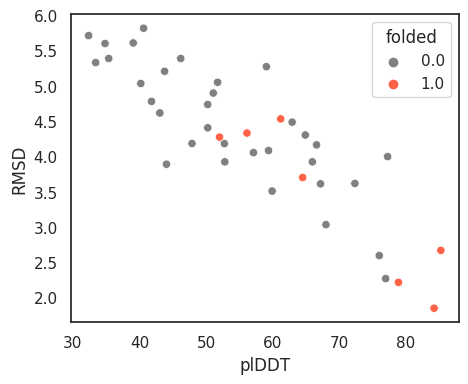

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
sns.scatterplot(data=dmean_AF, x="plDDT", y="RMSD", hue="folded",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

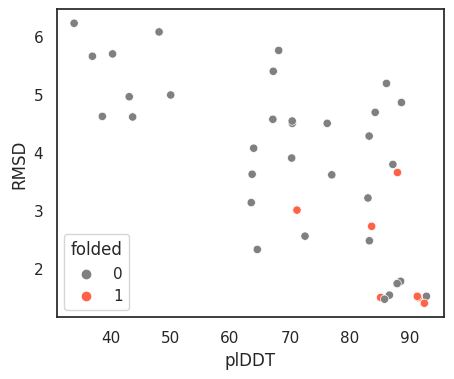

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
sns.scatterplot(data=dbest_p_AF, x="plDDT", y="RMSD", hue="folded",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
dbest_r_AF.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_4B.csv")

(22.0, 95.0)

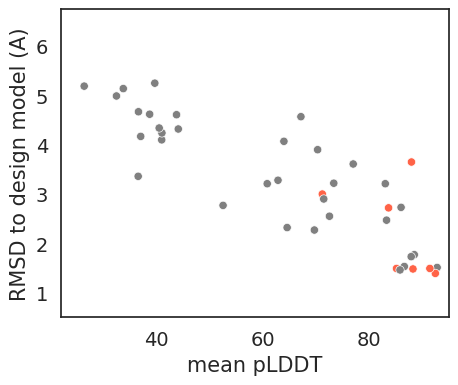

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dbest_r_AF, x="plDDT", y="RMSD", hue="folded",palette=cols, legend=None)
#ax.set_xlabel("mean pLDDT",fontsize=15)
#ax.set_ylabel("RMSD to design model (A)",fontsize=15)
#ax.tick_params(labelsize=14)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.75)
plt.xlim(22, 95)

In [ ]:
dAF_Filt = dAF_F.loc[(dAF_F["beta_sheet"]>32) & (dAF_F["aggregation"]<1800) ]

In [ ]:
dmean_AF_Filt = dAF_Filt.groupby(level=0).mean()
dbest_p_AF_Filt = dAF_Filt.sort_values("plDDT").groupby(level=0).nth(4)
dbest_r_AF_Filt = dAF_Filt.sort_values("RMSD").groupby(level=0).nth(0)

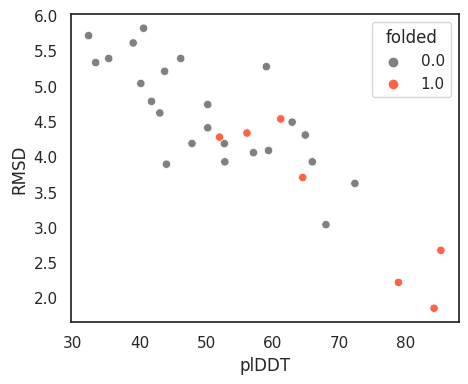

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
sns.scatterplot(data=dmean_AF_Filt, x="plDDT", y="RMSD", hue="folded",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

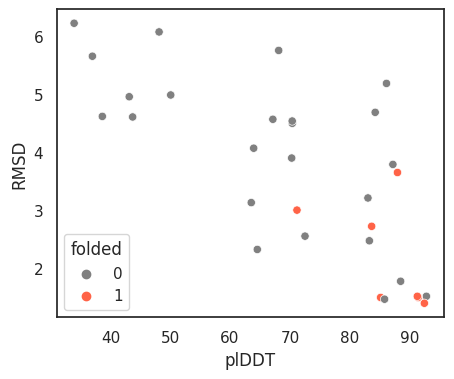

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
sns.scatterplot(data=dbest_p_AF_Filt, x="plDDT", y="RMSD", hue="folded",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(22.0, 95.0)

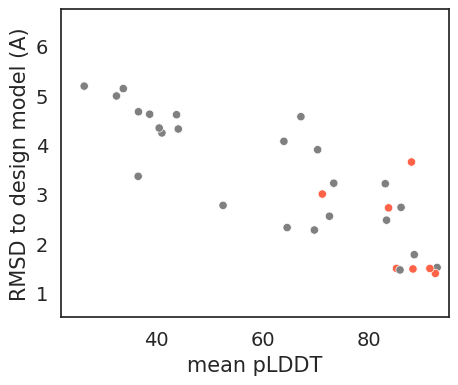

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dbest_r_AF_Filt, x="plDDT", y="RMSD", hue="folded",palette=cols, legend=None)
#ax.set_xlabel("mean pLDDT",fontsize=15)
#ax.set_ylabel("RMSD to design model (A)",fontsize=15)
#ax.tick_params(labelsize=14)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.75)
plt.xlim(22, 95)